# Sentiment Analysis Using BERT

## Import Dependencies

In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Instantiate Model

In [3]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [27]:
tokens = tokenizer.encode('This is absolutely worst.',return_tensors = 'pt')

In [28]:
tokens[0]

tensor([  101, 10372, 10127, 35925, 10563, 43060,   119,   102])

In [29]:
tokenizer.decode(tokens[0])

'[CLS] this is absolutely worst. [SEP]'

## Encode & Calculate Sentiment

In [7]:
tokens = tokenizer.encode('This is fucking bad, absolutely worst',return_tensors = 'pt')

In [8]:
result = model(tokens)

In [9]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 5.2351,  1.6318, -0.8214, -2.8995, -2.2572]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [10]:
result.logits

tensor([[ 5.2351,  1.6318, -0.8214, -2.8995, -2.2572]],
       grad_fn=<AddmmBackward0>)

In [11]:
int(torch.argmax(result.logits)) + 1

1

In [12]:
r = requests.get('https://www.yelp.com/biz/cadillac-bar-and-grill-san-francisco')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class' : regex})
reviews = [result.text for result in results]

In [13]:
results[0].text

'Awesome place for a quick dinner before heading to a musical play at The Orpheum theater.This restaurant has great ambiance and pretty huge place in that area. Food was tasty but kinda pricey for 2 people.We will definitely come back though to try other items from their menu.'

In [14]:
results[-1].text

'Nicole. Too bad while you were complaining about the water, everyone else was having a great time. '

## Load reviews in dataframe

In [15]:
df = pd.DataFrame(np.array(reviews), columns = ['Reviews'])

In [16]:
df.Reviews.iloc[0]

'Awesome place for a quick dinner before heading to a musical play at The Orpheum theater.This restaurant has great ambiance and pretty huge place in that area. Food was tasty but kinda pricey for 2 people.We will definitely come back though to try other items from their menu.'

In [17]:
def sentiment_score(review) :
    tokens = tokenizer.encode(review,return_tensors = 'pt')
    result = model(tokens)
    return int(torch.argmax(result.logits)) + 1

In [18]:
df['Score'] = df['Reviews'].apply(sentiment_score)

In [125]:
##### Another way
# df['Sentiment'] = df['reviews'].apply(lambda x : sentiment_score(x[:512]))
# df = df.drop('Sentiment', axis = 1)

In [24]:
df

,Reviews,Score
0,Awesome place for a quick dinner before headin...,4
1,Glad we could be a part of your fun evening!,5
2,What happened to their burritos?! Chicken tast...,2
3,"Hey Krista, sorry you didn't enjoy your burrit...",2
4,I love Texmex and was excited to see this plac...,2
5,Thanks for stopping by during your time visiti...,1
6,Visited Cadillac Bar & Grill for the first tim...,3
7,"Hey Rhett, we're sorry that service was not up...",4
8,Excellent food to dine in or take out.Good hou...,5
9,"Delightful, tasty dinner before seeing a show ...",5


(array([1., 0., 5., 0., 0., 1., 0., 4., 0., 7.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

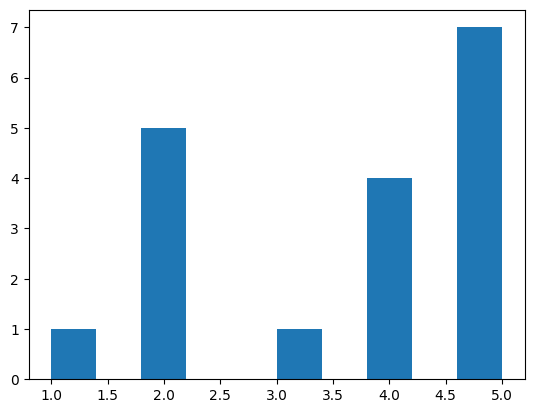

In [26]:
plt.hist(df.Score)